In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
pest=pd.read_csv("pesticides.csv")
rainfall=pd.read_csv("rainfall.csv")
temp=pd.read_csv("temp.csv")
yeild=pd.read_csv("yield.csv")

In [3]:
pest


,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [4]:
rainfall

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
...,...,...,...
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657


In [5]:
temp

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


In [6]:
yeild

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [7]:
# drop unwanted columns.
yeild = yeild.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
yeild.head()

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [8]:
yeild.columns

Index(['Area', 'Item', 'Year', 'Value'], dtype='object')

In [9]:
yeild.columns = yeild.columns.str.replace('Value', 'yeild')

In [10]:
rainfall.isnull().sum()

 Area                              0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

In [11]:
rainfall = rainfall.dropna()

In [12]:
rainfall.columns = rainfall.columns.str.replace(' Area', 'Area')

In [13]:
yeild = pd.merge(yeild, rainfall, on=['Year','Area'])


In [14]:
yeild

,Area,Item,Year,yeild,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327
1,Afghanistan,Potatoes,1985,140909,327
2,Afghanistan,"Rice, paddy",1985,22482,327
3,Afghanistan,Wheat,1985,12277,327
4,Afghanistan,Maize,1986,16875,327
...,...,...,...,...,...
25395,Zimbabwe,"Rice, paddy",2016,22828,657
25396,Zimbabwe,Sorghum,2016,2688,657
25397,Zimbabwe,Soybeans,2016,12727,657
25398,Zimbabwe,Sweet potatoes,2016,22212,657


In [15]:
yeild.isnull().sum()

Area                             0
Item                             0
Year                             0
yeild                            0
average_rain_fall_mm_per_year    0
dtype: int64

In [16]:
temp.isnull().sum()

year           0
country        0
avg_temp    2547
dtype: int64

In [17]:
temp=temp.dropna()

In [18]:
temp.columns=temp.columns.str.replace('country','Area')

In [19]:
temp.columns=temp.columns.str.replace('year','Year')

In [20]:
yeild = pd.merge(yeild, temp, on=['Year','Area'])

In [21]:
yeild.shape

(44135, 6)

In [22]:
pest.columns=pest.columns.str.replace('Value','pesticides')

In [23]:
pest=pest.drop(['Domain','Element','Item','Unit'],axis=1)

In [24]:
pest

,Area,Year,pesticides
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
...,...,...,...
4344,Zimbabwe,2012,3375.53
4345,Zimbabwe,2013,2550.07
4346,Zimbabwe,2014,2185.07
4347,Zimbabwe,2015,2185.07


In [25]:
df = pd.merge(yeild, pest, on=['Year','Area'])

In [26]:
df

,Area,Item,Year,yeild,average_rain_fall_mm_per_year,avg_temp,pesticides
0,Albania,Maize,1990,36613,1485,16.37,121.00
1,Albania,Potatoes,1990,66667,1485,16.37,121.00
2,Albania,"Rice, paddy",1990,23333,1485,16.37,121.00
3,Albania,Sorghum,1990,12500,1485,16.37,121.00
4,Albania,Soybeans,1990,7000,1485,16.37,121.00
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,22581,657,19.76,2550.07
28244,Zimbabwe,Sorghum,2013,3066,657,19.76,2550.07
28245,Zimbabwe,Soybeans,2013,13142,657,19.76,2550.07
28246,Zimbabwe,Sweet potatoes,2013,22222,657,19.76,2550.07


In [27]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
yeild                            0
average_rain_fall_mm_per_year    0
avg_temp                         0
pesticides                       0
dtype: int64

In [28]:
df.dtypes

Area                              object
Item                              object
Year                               int64
yeild                              int64
average_rain_fall_mm_per_year     object
avg_temp                         float64
pesticides                       float64
dtype: object

In [29]:
df['Item'].value_counts()

Potatoes                4276
Maize                   4123
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2892
Cassava                 2047
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [30]:
df['average_rain_fall_mm_per_year'] = pd.to_numeric(df['average_rain_fall_mm_per_year'],errors = 'coerce')

In [31]:
df

,Area,Item,Year,yeild,average_rain_fall_mm_per_year,avg_temp,pesticides
0,Albania,Maize,1990,36613,1485.0,16.37,121.00
1,Albania,Potatoes,1990,66667,1485.0,16.37,121.00
2,Albania,"Rice, paddy",1990,23333,1485.0,16.37,121.00
3,Albania,Sorghum,1990,12500,1485.0,16.37,121.00
4,Albania,Soybeans,1990,7000,1485.0,16.37,121.00
...,...,...,...,...,...,...,...
28243,Zimbabwe,"Rice, paddy",2013,22581,657.0,19.76,2550.07
28244,Zimbabwe,Sorghum,2013,3066,657.0,19.76,2550.07
28245,Zimbabwe,Soybeans,2013,13142,657.0,19.76,2550.07
28246,Zimbabwe,Sweet potatoes,2013,22222,657.0,19.76,2550.07


<BarContainer object of 28248 artists>

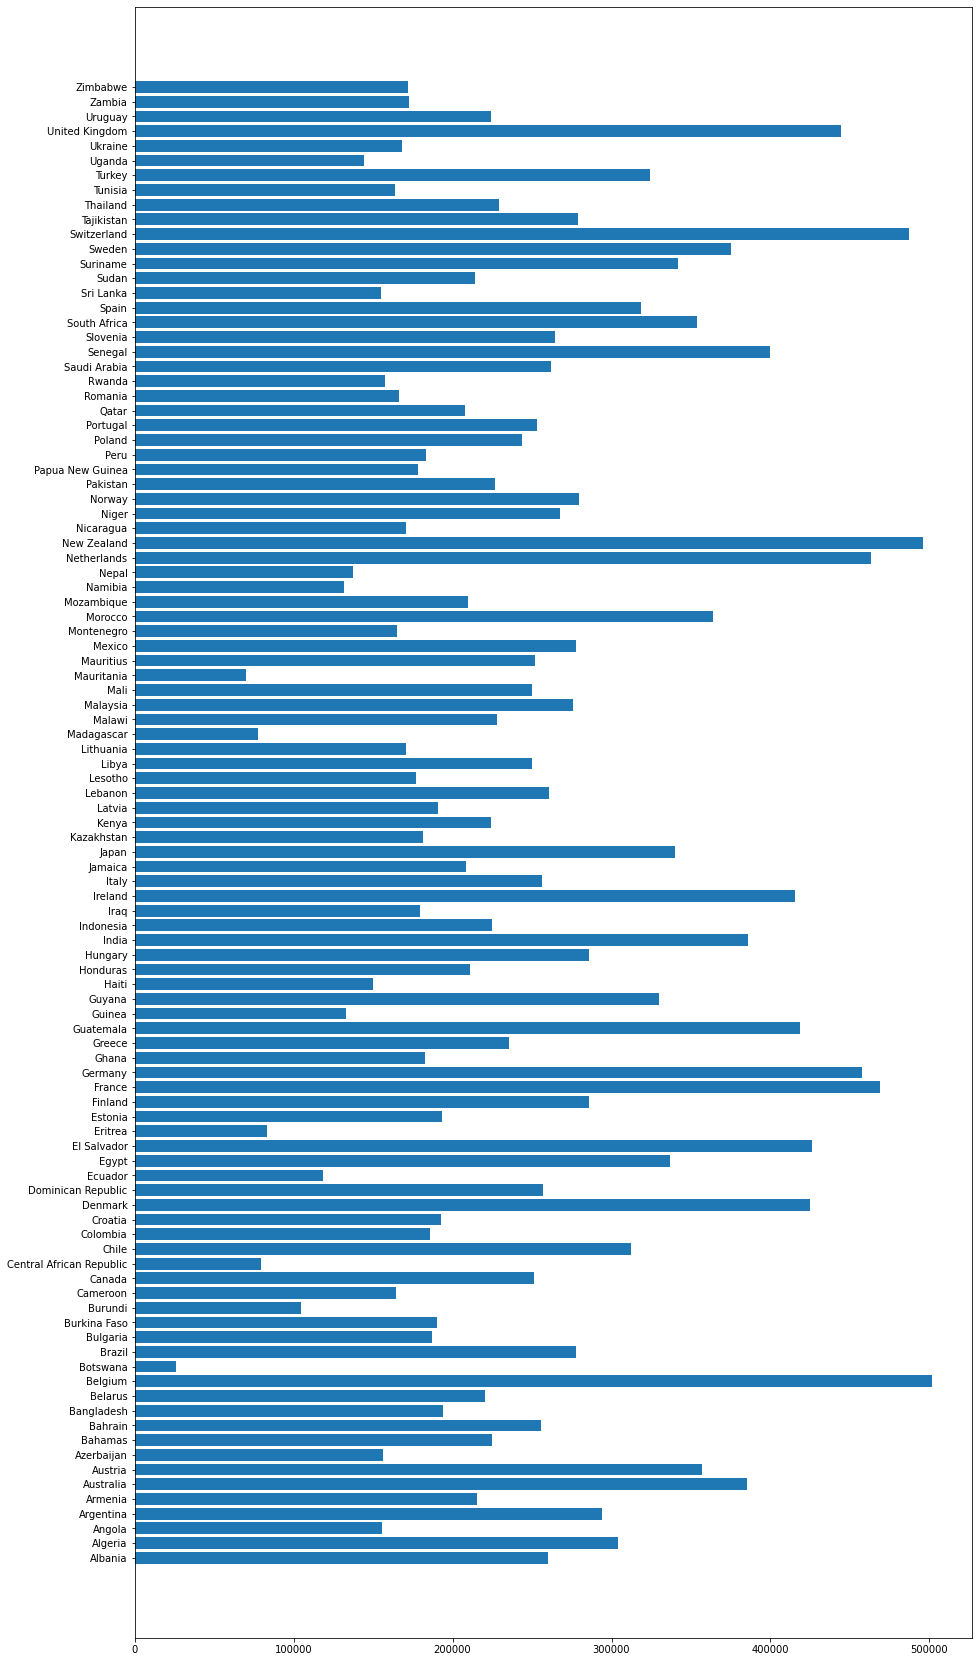

In [32]:
fig, ax = plt.subplots(figsize =(15, 30))
ax.barh(df['Area'],df['yeild'])

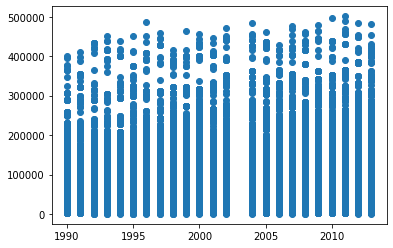

In [33]:
plt.scatter(df['Year'],df['yeild'])

<BarContainer object of 28248 artists>

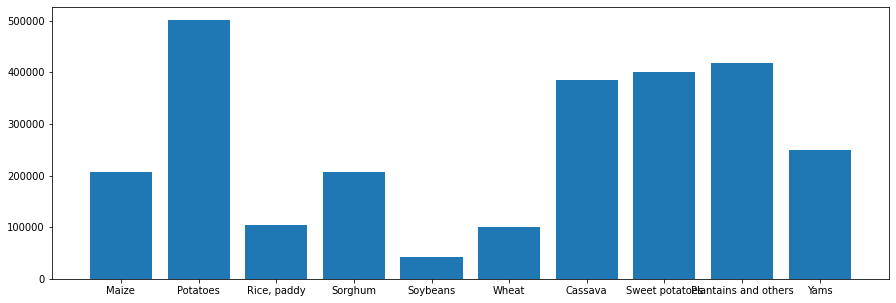

In [34]:
fig = plt.figure(figsize = (15, 5))
plt.bar(df['Item'],df['yeild'])

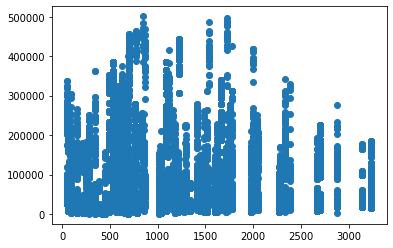

In [35]:
plt.scatter(df['average_rain_fall_mm_per_year'],df['yeild'])

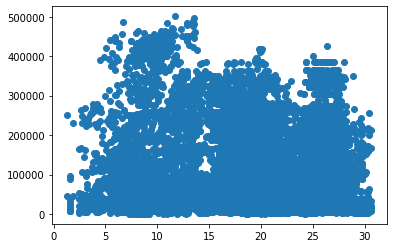

In [36]:
plt.scatter(df['avg_temp'],df['yeild'])

In [37]:
df.dtypes

Area                              object
Item                              object
Year                               int64
yeild                              int64
average_rain_fall_mm_per_year    float64
avg_temp                         float64
pesticides                       float64
dtype: object

In [38]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
yeild                            0
average_rain_fall_mm_per_year    6
avg_temp                         0
pesticides                       0
dtype: int64

In [39]:

df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].fillna(df['average_rain_fall_mm_per_year'].mean())

In [40]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Area']= label_encoder.fit_transform(df['Area'])

#df['Item']= label_encoder.fit_transform(df['Item'])  
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Item']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

In [41]:
final_df=final_df.drop(['Item'],axis=1)

In [42]:
y=final_df[["yeild"]]
x=final_df.drop(["yeild"],axis=1)


In [43]:
ratio = 0.75
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
x_train =(x[0:train_size].values)

y_train=(y[0:train_size].values)
x_test =(x[train_size:].values)

y_test =(y[train_size:].values)

In [44]:
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None
        #constructor to the class which set coefficients to none
    def fit(self, X, y):
        # Add a column of ones to the design matrix X
        X_design = [[1] + row for row in X] #adding ones column to calculate b0 value
        #calculating no of columns in x
        n = 0
        for _ in X[0]:
           n += 1
        m = 0
        #calculating no of rows in y
        for row in  y:
         m += 1   
        
        
        # Initialize the normal equations matrix A and the right-hand side vector b
        A = [[0] * n for i in range(n)]#an empty array with shape as n*n(2D)
        b = [0] * n #1D array
        
        # Fill in the elements of A and b with x and y
        for i in range(n):
            for j in range(n):
                for k in range(m):
                    A[i][j] += X_design[k][i] * X_design[k][j] #x_design*xtranspose
            for k in range(m):
                b[i] += X_design[k][i] * y[k] #b=xtranspose*y
        
        # Solve the system of linear equations Ax = b using Gaussian elimination
        #(x^T * A) * c = x^T * b
       # Partial pivoting: Find the kth pivot by swapping rows, to move the entry with the largest absolute value to the pivot position. This imparts computational stability to the algorithm.
       #For each row below the pivot, calculate the factor f which makes the kth entry zero, and for every element in the row subtract the fth multiple of the corresponding element in the kth row.
       #Repeat above steps for each unknown. We will be left with a partial r.e.f. matrix.
        for i in range(n):
            for j in range(i + 1, n):
                factor = A[j][i] / A[i][i]
                for k in range(i + 1, n):
                    A[j][k] -= factor * A[i][k]
                b[j] -= factor * b[i]
                
        self.coefficients = [0] * n
        for i in range(n - 1, -1, -1):
            for j in range(i + 1, n):
                b[i] -= A[i][j] * self.coefficients[j]
            self.coefficients[i] = b[i] / A[i][i]
        print(self.coefficients)
    def predict(self, X):
        X_design = [[1] + row for row in X]
        n_rows = 0
        for row in X_design:
          n_rows += 1

        n_cols = 0
        for col in self.coefficients:
          n_cols += 1  

        y_pred = [0] * n_rows
        for i in range(n_rows):
          y_pred[i] = 0
          for j in range(n_cols):
            y_pred[i] += X_design[i][j] * self.coefficients[j]
  

        return y_pred


In [45]:
mlr = MultipleLinearRegression()

# Fit the model to the data
mlr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = mlr.predict(x_test)

[array([175.29833315]), array([977.42385307]), array([-6.87392844]), array([-1810.10776317]), array([0.0979793]), array([-86675.89623416]), array([-218472.16422292]), array([-137415.35237571]), array([-62149.80545444]), array([-208432.61808646]), array([-232063.26040485]), array([-237018.96911724]), array([-123156.61140961]), array([-228518.50155596]), array([-134528.42850634])]


In [46]:
# Calculate the sum of squared residuals
residuals = y_pred - y_test
ss_residuals = np.sum(residuals**2)

# Calculate the total sum of squares
mean_y = np.mean(y_test)
ss_total = np.sum((y_test - mean_y)**2)

# Calculate R^2
R2 = 1 - (ss_residuals / ss_total)
print(R2)

0.6407143031896791
